# Better life index
### Get the data from https://homl.info/4

In [1]:
import urllib 
import os 
import pandas as pd 
import numpy as np
import sklearn 
import matplotlib.pyplot as plt 
import matplotlib as mpl 

# change matplot lib settings 
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
# define root location from where the data needs to be downloaded 
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"

In [3]:
# create DATA Folder in the current working director 
# os.makedirs('DATA')

In [4]:
# create fodler structure to store the data from the website 
datapath = os.path.join("DATA", "Chapter1", "lifesat")
# os.makedirs(datapath)

### oecd_bli_2015.csv can be downloaded from 
https://data-explorer.oecd.org/vis?tenant=archive&df[ds]=DisseminateArchiveDMZ&df[id]=DF_BLI&df[ag]=OECD&dq=...&to[TIME]=false&ly[cl]=INDICATOR&ly[rs]=INEQUALITY&ly[rw]=LOCATION&vw=tb
<br><br><br>
This is imporatant to note - <br>
INEQUALITY Column has different values like Men, Women, Low, High, and Total. We are picking only Total 

In [5]:
# download the data 
import urllib.request

for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print (f"Downloading {filename}")
    url = DOWNLOAD_ROOT + 'datasets/lifesat/' + filename 
    urllib.request.urlretrieve(url, os.path.join(datapath, filename))

In [6]:
def prepare_country_stat(df_oecd, df_gdp):

    # Dice the data and get only inequality set to "TOT" value 
    df_oecd = df_oecd[df_oecd["INEQUALITY"] == "TOT"]

    # use Indicator column to pivot the data and get the count 
    df_oecd = df_oecd.pivot(index="Country", columns="Indicator", values="Value")

    # rename the name if GDP dataframe column from 2015 to GDP Per Capita 
    df_gdp.rename(columns={"2015" : "GDP per capita"}, inplace=True)
    df_gdp.set_index("Country", inplace=True)

    # merge the datasets 
    df_full_stats = pd.merge(left=df_oecd, right=df_gdp, left_index=True, right_index=True)
    df_full_stats.sort_values(by="GDP per capita", inplace=True)

    # remove set of indcies 
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))

    return df_full_stats[["GDP per capita", "Life satisfaction"]].iloc[keep_indices]
    


In [7]:
# read downloaded csvs to Pandas dataframe 
df_oecd = pd.read_csv(os.path.join(datapath, "oecd_bli_2015.csv"), thousands=",")
df_gdp = pd.read_csv(os.path.join(datapath, "gdp_per_capita.csv"), thousands=",", delimiter="\t", encoding="latin1", na_values="n/a")

In [8]:
df_oecd.shape

(3292, 17)

In [9]:
df_oecd['INEQUALITY'].value_counts()

TOT    888
MN     881
WMN    881
HGH    328
LW     314
Name: INEQUALITY, dtype: int64

In [10]:
# check the shape of dataframe after taking only "TOT" into consideration 
df_oecd[df_oecd["INEQUALITY"] == "TOT"].shape


(888, 17)

In [11]:
# check the values of indicator column 
df_oecd[df_oecd["INEQUALITY"] == "TOT"]["Indicator"].value_counts()


Dwellings without basic facilities           37
Housing expenditure                          37
Employees working very long hours            37
Homicide rate                                37
Assault rate                                 37
Life satisfaction                            37
Self-reported health                         37
Life expectancy                              37
Voter turnout                                37
Consultation on rule-making                  37
Water quality                                37
Air pollution                                37
Years in education                           37
Student skills                               37
Educational attainment                       37
Quality of support network                   37
Personal earnings                            37
Long-term unemployment rate                  37
Job security                                 37
Employment rate                              37
Household net financial wealth          

In [12]:
df_oecd[df_oecd["INEQUALITY"] == "TOT"].pivot(index="Country", columns="Indicator", values="Value")

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,...,3.88,48082.0,94.0,2.2,74.0,509.0,15.71,89.0,87.0,18.9
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,1.97,17177.0,90.0,1.6,69.0,402.0,14.97,79.0,72.0,16.3
Canada,15.0,1.3,10.5,0.2,89.0,3.94,72.0,1.5,29365.0,67913.0,...,0.90,46911.0,92.0,2.5,89.0,522.0,14.25,61.0,91.0,17.2
Chile,46.0,6.9,2.0,9.4,57.0,15.42,62.0,4.4,14533.0,17733.0,...,1.59,22101.0,86.0,1.2,59.0,436.0,14.41,49.0,73.0,16.5
Czech Republic,16.0,2.8,6.8,0.9,92.0,6.98,68.0,0.8,18404.0,17299.0,...,3.12,20338.0,85.0,1.4,60.0,500.0,14.98,59.0,85.0,18.1
Denmark,15.0,3.9,7.0,0.9,78.0,2.03,73.0,0.3,26491.0,44488.0,...,1.78,48347.0,95.0,1.9,72.0,498.0,16.06,88.0,94.0,19.4
Estonia,9.0,5.5,3.3,8.1,90.0,3.30,68.0,4.8,15167.0,7680.0,...,3.82,18944.0,89.0,1.5,54.0,526.0,14.90,64.0,79.0,17.5


In [13]:
country_stat = prepare_country_stat(df_oecd, df_gdp)


In [14]:
country_stat.head()

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1


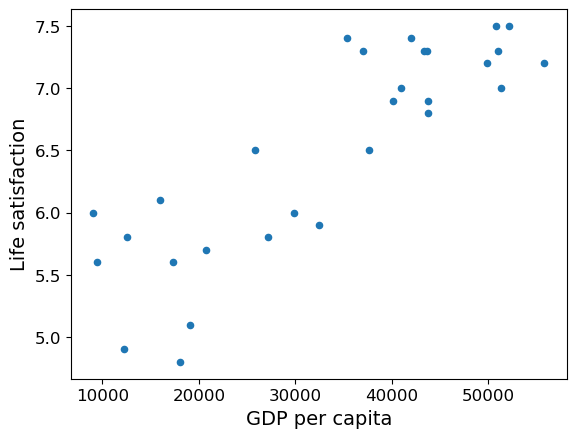

In [15]:
X = np.c_[country_stat["GDP per capita"]]
y = np.c_[country_stat["Life satisfaction"]]

# Visualize the data 
country_stat.plot(kind="scatter", x="GDP per capita", y="Life satisfaction")
plt.show()

In [16]:
# Create linear regression mode 
import sklearn.linear_model


model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

In [17]:
X_new = [[22587]]
print (model.predict(X_new))

[[5.96242338]]


# Store the Outputs to a location

In [18]:
# os.makedirs(os.path.join("OUTPUT", "images", "Chapter1"))

In [19]:
def save_figure(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    output_image_path = os.path.join("OUTPUT", "images", "Chapter1", f"{fig_id}.{fig_extension}")
    print (f"Saving {fig_id}.{fig_extension}")
    if tight_layout:
        plt.tight_layout()
    plt.savefig(output_image_path, format=fig_extension, dpi=resolution)

In [20]:
# Make notebook to give repeatable result 
np.random.seed(42) 

In [21]:
# Read the data to dataframe
df_oecd = pd.read_csv(os.path.join(datapath, "oecd_bli_2015.csv"), thousands=",")
df_oecd = df_oecd[df_oecd["INEQUALITY"] == "TOT"]
df_oecd = df_oecd.pivot(index="Country", columns="Indicator", values="Value")
df_oecd.head(5)

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,...,3.88,48082.0,94.0,2.2,74.0,509.0,15.71,89.0,87.0,18.9
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,1.97,17177.0,90.0,1.6,69.0,402.0,14.97,79.0,72.0,16.3
Canada,15.0,1.3,10.5,0.2,89.0,3.94,72.0,1.5,29365.0,67913.0,...,0.90,46911.0,92.0,2.5,89.0,522.0,14.25,61.0,91.0,17.2


In [22]:
df_oecd.columns

Index(['Air pollution', 'Assault rate', 'Consultation on rule-making',
       'Dwellings without basic facilities', 'Educational attainment',
       'Employees working very long hours', 'Employment rate', 'Homicide rate',
       'Household net adjusted disposable income',
       'Household net financial wealth', 'Housing expenditure', 'Job security',
       'Life expectancy', 'Life satisfaction', 'Long-term unemployment rate',
       'Personal earnings', 'Quality of support network', 'Rooms per person',
       'Self-reported health', 'Student skills',
       'Time devoted to leisure and personal care', 'Voter turnout',
       'Water quality', 'Years in education'],
      dtype='object', name='Indicator')

In [23]:
df_oecd["Life satisfaction"].head(5)

Country
Australia    7.3
Austria      6.9
Belgium      6.9
Brazil       7.0
Canada       7.3
Name: Life satisfaction, dtype: float64

In [24]:
# read GDP dataset 
df_gdp = pd.read_csv(os.path.join(datapath, "gdp_per_capita.csv"), thousands=",", delimiter="\t", encoding="latin1", na_values="n/a")
df_gdp.rename(columns={"2015": "GDP per capita"}, inplace=True)
df_gdp.set_index("Country", inplace=True)
df_gdp.head(5)

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [25]:
# join using country name as key
df_country_stat = pd.merge(left=df_oecd, right=df_gdp, left_index=True, right_index=True)
df_country_stat.sort_values(by="GDP per capita", inplace=True)
df_country_stat.head(5)

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,14.97,79.0,72.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Mexico,30.0,12.8,9.0,4.2,37.0,28.83,61.0,23.4,13085.0,9056.0,...,13.89,63.0,67.0,14.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9009.280,2015.0
Russia,15.0,3.8,2.5,15.1,94.0,0.16,69.0,12.8,19292.0,3412.0,...,14.97,65.0,56.0,16.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9054.914,2015.0
Turkey,35.0,5.0,5.5,12.7,34.0,40.86,50.0,1.2,14095.0,3251.0,...,13.42,88.0,62.0,16.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9437.372,2013.0
Hungary,15.0,3.6,7.9,4.8,82.0,3.19,58.0,1.3,15442.0,13277.0,...,15.04,62.0,77.0,17.6,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12239.894,2015.0


In [26]:
df_country_stat[["GDP per capita", "Life satisfaction"]].loc["United States"]

GDP per capita       55805.204
Life satisfaction        7.200
Name: United States, dtype: float64

In [27]:
df_country_stat[["GDP per capita", "Life satisfaction"]].loc["Hungary"]

GDP per capita       12239.894
Life satisfaction        4.900
Name: Hungary, dtype: float64

In [28]:
df_country_stat[["GDP per capita", "Life satisfaction"]].loc["Korea"]

GDP per capita       27195.197
Life satisfaction        5.800
Name: Korea, dtype: float64

In [29]:
df_country_stat[["GDP per capita", "Life satisfaction"]].loc["France"]

GDP per capita       37675.006
Life satisfaction        6.500
Name: France, dtype: float64

In [30]:
df_country_stat[["GDP per capita", "Life satisfaction"]].loc["Australia"]

GDP per capita       50961.865
Life satisfaction        7.300
Name: Australia, dtype: float64

In [31]:
remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

In [32]:
# create training and dataset 
df_sample = df_country_stat[["GDP per capita", "Life satisfaction"]].iloc[keep_indices]
df_missing = df_country_stat[["GDP per capita", "Life satisfaction"]].iloc[remove_indices]

In [33]:
df_sample.shape

(29, 2)

In [34]:
df_missing.shape

(7, 2)

Saving Money Happy Scatterplot.png


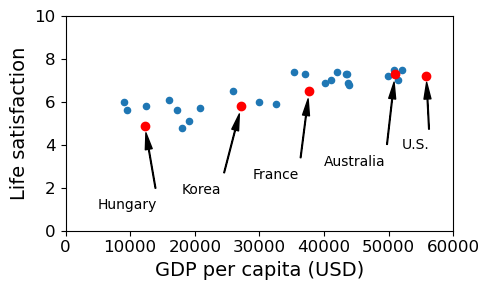

In [35]:
df_sample.plot(kind="scatter", x="GDP per capita", y="Life satisfaction", figsize=(5,3))
plt.axis([0, 60000, 0, 10])

# Create image file with arrows on Hungary, Korea, France, Australia and US 
position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}

for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = df_sample.loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")
plt.xlabel("GDP per capita (USD)")
save_figure("Money Happy Scatterplot")

Saving tweaking_model_params_plot.png


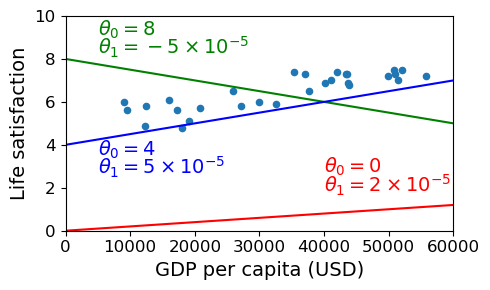

In [36]:
# create the diagram depecting different theta value and how they fit to linear regression 
df_sample.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.xlabel("GDP per capita (USD)")
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)

# create a red line with slope 2/100000 
plt.plot(X, 2*X/100000, "r")
plt.text(40000, 2.7, r"$\theta_0 = 0$", fontsize=14, color="r")
plt.text(40000, 1.8, r"$\theta_1 = 2 \times 10^{-5}$", fontsize=14, color="r")

# create green line with negative slope 
plt.plot(X, 8 - 5*X/100000, "g")
plt.text(5000, 9.1, r"$\theta_0 = 8$", fontsize=14, color="g")
plt.text(5000, 8.2, r"$\theta_1 = -5 \times 10^{-5}$", fontsize=14, color="g")

# create green line with negative slope 
plt.plot(X, 4 + 5*X/100000, "b")
plt.text(5000, 3.5, r"$\theta_0 = 4$", fontsize=14, color="b")
plt.text(5000, 2.6, r"$\theta_1 = 5 \times 10^{-5}$", fontsize=14, color="b")

# save and show 
save_figure("tweaking_model_params_plot")
plt.show()


In [37]:
# get the list populated with numpy values 
X[:10]

array([  0.        ,  60.06006006, 120.12012012, 180.18018018,
       240.24024024, 300.3003003 , 360.36036036, 420.42042042,
       480.48048048, 540.54054054])

In [38]:
# choose the best fit by selecting the linear regression model and fitting the data into it 
import sklearn.linear_model

model = sklearn.linear_model.LinearRegression()
XSample = np.c_[df_sample["GDP per capita"]]
ysample = np.c_[df_sample["Life satisfaction"]]
model.fit(XSample, ysample)

# get the theta values 
t0, t1=model.intercept_[0], model.coef_[0][0]
t0, t1

(4.853052800266436, 4.911544589158484e-05)

Saving best_fit_model_plot.png


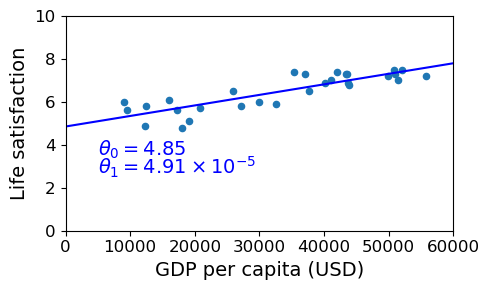

In [39]:
df_sample.plot(kind="scatter", x="GDP per capita", y="Life satisfaction", figsize=(5, 3))
plt.xlabel("GDP per capita (USD)")
plt.axis([0, 60000, 0, 10])
X =np.linspace(0, 60000, 1000)

plt.plot(X, t0 + t1*X, "b")
plt.text(5000, 3.5, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.6, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")

save_figure("best_fit_model_plot")
plt.show()


In [40]:
# get the value for Cyprus 
X_cyprus = df_gdp.loc["Cyprus"]["GDP per capita"]
X_cyprus

22587.49

In [41]:
y_cyprus_predict = model.predict([[X_cyprus]])

In [42]:
y_cyprus_predict[0][0]

5.96244744318815

Saving cyprus_prediction_plot.png


/Users/rohitabhishek/opt/anaconda3/envs/mlenv/lib/python3.8/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


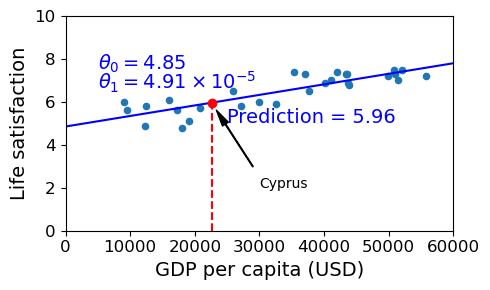

In [43]:
df_sample.plot(kind="scatter", x="GDP per capita", y="Life satisfaction", figsize=(5, 3))
plt.xlabel("GDP per capita (USD)")
plt.axis([0, 60000, 0, 10])
X =np.linspace(0, 60000, 1000)

# plot the blue line with the best fit values 
plt.plot(X, t0 + t1*X, "b")
plt.text(5000, 7.5, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 6.6, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")

plt.plot([X_cyprus, X_cyprus], [0, y_cyprus_predict], "r--")
plt.text(25000, 5.0, r"Prediction = 5.96", fontsize=14, color="b")
plt.plot(X_cyprus, y_cyprus_predict, "ro")

plt.annotate("Cyprus", xy=(X_cyprus, y_cyprus_predict), xytext=(30000, 2), arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))

save_figure("cyprus_prediction_plot")
plt.show()


# Get the missing data

In [44]:
df_missing

,GDP per capita,Life satisfaction
Country,,
Brazil,8669.998,7.0
Mexico,9009.280,6.7
Chile,13340.905,6.7
Czech Republic,17256.918,6.5
Norway,74822.106,7.4
Switzerland,80675.308,7.5
Luxembourg,101994.093,6.9


In [45]:
position_text = {
    "Brazil": (1000, 9.0),
    "Mexico": (11000, 9.0),
    "Chile": (25000, 9.0),
    "Czech Republic": (35000, 9.0),
    "Norway": (60000, 3),
    "Switzerland": (72000, 3.0),
    "Luxembourg": (90000, 3.0),
}

Saving representative_training_data_scatterplot.png


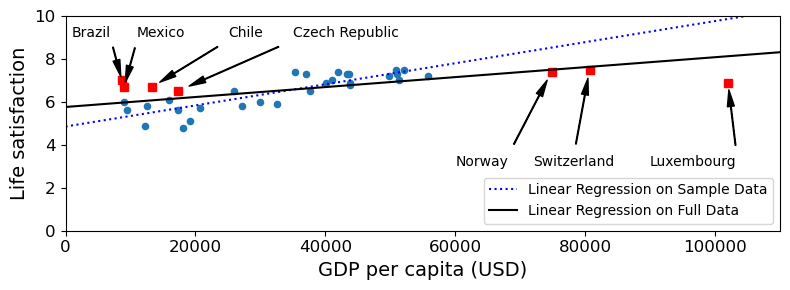

In [46]:
from sklearn import linear_model

#  plot the known data first
df_sample.plot(kind="scatter", x="GDP per capita", y="Life satisfaction", figsize=(8,3))
plt.axis([0, 110000, 0, 10])

# create line for y=theta_0 + theta_1 * x (on df_sample)
X=np.linspace(0, 110000, 1000)
plt.plot(X, t0 + t1*X, "b:", label="Linear Regression on Sample Data")

# get the linear regression value for full dataset 
linear_regression_full = linear_model.LinearRegression()
X_full = np.c_[df_country_stat["GDP per capita"]]
y_full = np.c_[df_country_stat["Life satisfaction"]]
linear_regression_full.fit(X_full, y_full)

# get the theata values 
t0_full, t1_full = linear_regression_full.intercept_[0], linear_regression_full.coef_[0][0]

# get the annotations for missing data
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = df_missing.loc[country]
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "rs")

# plot for new value of theta 
plt.plot(X, t0_full + t1_full * X, "k", label="Linear Regression on Full Data")


# add labels 
plt.xlabel("GDP per capita (USD)")
plt.legend(loc="lower right")

save_figure('representative_training_data_scatterplot')
plt.show()


In [47]:
df_country_stat[df_country_stat["GDP per capita"].isna()]

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,


In [48]:
df_country_stat[df_country_stat["Life satisfaction"].isna()]

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,


/Users/rohitabhishek/opt/anaconda3/envs/mlenv/lib/python3.8/site-packages/sklearn/utils/extmath.py:1000: RuntimeWarning: overflow encountered in square
  temp **= 2
/Users/rohitabhishek/opt/anaconda3/envs/mlenv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/rohitabhishek/opt/anaconda3/envs/mlenv/lib/python3.8/site-packages/sklearn/utils/extmath.py:1006: RuntimeWarning: overflow encountered in square
  new_unnormalized_variance -= correction**2 / new_sample_count
/Users/rohitabhishek/opt/anaconda3/envs/mlenv/lib/python3.8/site-packages/sklearn/utils/extmath.py:1006: RuntimeWarning: invalid value encountered in subtract
  new_unnormalized_variance -= correction**2 / new_sample_count
/Users/rohitabhishek/opt/anaconda3/envs/mlenv/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:84: RuntimeWarning: overflow encountered in square
  upper_bound = n_samples * ep

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

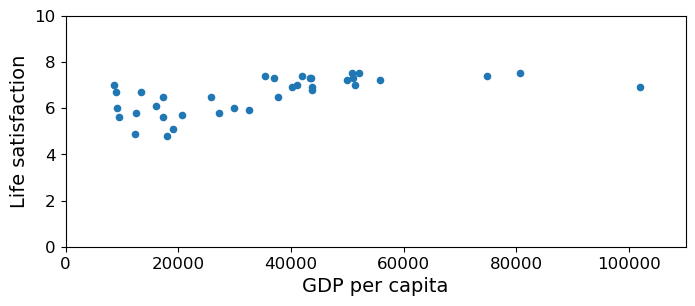

In [51]:
from sklearn import preprocessing 
from sklearn import pipeline
from sklearn import linear_model

df_country_stat = df_country_stat.fillna(0)

df_country_stat.plot(kind="scatter", x="GDP per capita", y="Life satisfaction", figsize=(8,3))
plt.axis([0, 110000, 0, 10])

poly = preprocessing.PolynomialFeatures(degree=60, include_bias=False)
scaler = preprocessing.StandardScaler()
lin_reg2 = linear_model.LinearRegression()


X_full = np.c_[df_country_stat["GDP per capita"]]
y_full = np.c_[df_country_stat["Life satisfaction"]]
X = np.linspace(0, 110000, 1000)

pipeline_regression = pipeline.Pipeline([('poly', poly), ('scal', scaler), ('lin', lin_reg2)])
pipeline_regression.fit(X_full, y_full)
curve = pipeline_regression.predict(X[:, np.newaxis])
plt.plot(X, curve)
plt.xlabel("GDP per capita (USD)")
save_figure("overfitting_model")
plt.show()